In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

import re
import json

In [2]:
def comp_matrix_to_shared_unique(filename, A_name='A', B_name='B'):
    """Convert Kat matrix to dataframe of shared vs. unique k-mer counts
    
    Reformat to a dataframe for plotting k-mer count spectra by 
    taking row and col sums after slicing the first row and col 
    representing k-mers unique to either input library.
    """
    mx = np.loadtxt(filename, dtype=int)
    # unique k-mers in either library A or B
    A_unique = mx[:,0]
    B_unique = mx[0,:]
    # col and row sums for shared k-mers
    A_shared = mx[1:, 1:].sum(axis=1)
    B_shared = mx[1:, 1:].sum(axis=0)
    # insert zero values to bring all arrays to same length
    A_shared = np.insert(A_shared, 0, [0])
    B_shared = np.insert(B_shared, 0, [0])
    df = pd.DataFrame({f'{A_name}_unique' : A_unique, 
                       f'{B_name}_unique' : B_unique, 
                       f'{A_name}_shared' : A_shared, 
                       f'{B_name}_shared' : B_shared})
    df = df.reset_index().melt(id_vars='index', var_name='comb', value_name='count')
    df[['library','shared']] = df['comb'].str.split('_',expand=True)
    return(df)

In [3]:
def comp_matrix_to_shared_unique(filename, A_name='A', B_name='B'):
    """Convert Kat matrix to dataframe of shared vs. unique k-mer counts
    
    Reformat to a dataframe for plotting k-mer count spectra by 
    taking row and col sums after slicing the first row and col 
    representing k-mers unique to either input library.
    """
    mx = np.loadtxt(filename, dtype=int)
    # unique k-mers in either library A or B
    A_unique = mx[:,0]
    B_unique = mx[0,:]
    # col and row sums for shared k-mers
    A_shared = mx[1:, 1:].sum(axis=1)
    B_shared = mx[1:, 1:].sum(axis=0)
    # insert zero values to bring all arrays to same length
    A_shared = np.insert(A_shared, 0, [0])
    B_shared = np.insert(B_shared, 0, [0])
    df = pd.DataFrame({f'{A_name}_unique' : A_unique, 
                       f'{B_name}_unique' : B_unique, 
                       f'{A_name}_shared' : A_shared, 
                       f'{B_name}_shared' : B_shared})
    df = df.reset_index().melt(id_vars='index', var_name='comb', value_name='count')
    df[['library','shared']] = df['comb'].str.split('_',expand=True)
    return(df)

# Pairwise comparison of MIC vs MAC libraries (subsamples)

In [4]:
lib_AB = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMAC.rep1.LstrMAC.rep2.150000000-main.mx",
                                      A_name='MAC.1', B_name='MAC.2')
lib_AC = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMAC.rep1.LstrMIC.rep1.150000000-main.mx",
                                      A_name='MAC.1', B_name='MIC.1')
lib_AD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMAC.rep1.LstrMIC.rep2.150000000-main.mx",
                                      A_name='MAC.1', B_name='MIC.2')
lib_BC = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMAC.rep2.LstrMIC.rep1.150000000-main.mx",
                                      A_name='MAC.2', B_name='MIC.1')
lib_BD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMAC.rep2.LstrMIC.rep2.150000000-main.mx",
                                      A_name='MAC.2', B_name='MIC.2')
lib_CD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LstrMIC.rep1.LstrMIC.rep2.150000000-main.mx",
                                      A_name='MIC.1', B_name='MIC.2')

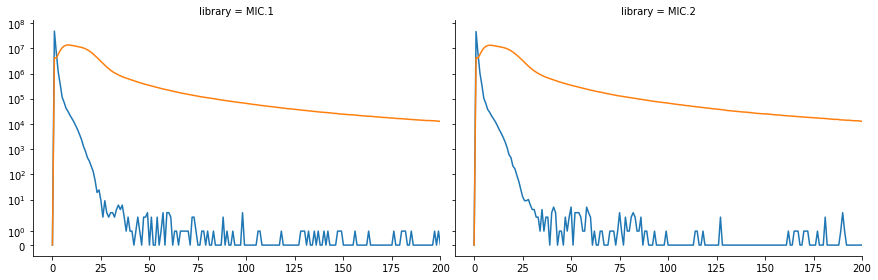

In [5]:
g = sns.FacetGrid(lib_CD, col='library', hue='shared', height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='index', y='count')
plt.xlim(-10,200)
plt.yscale('symlog')

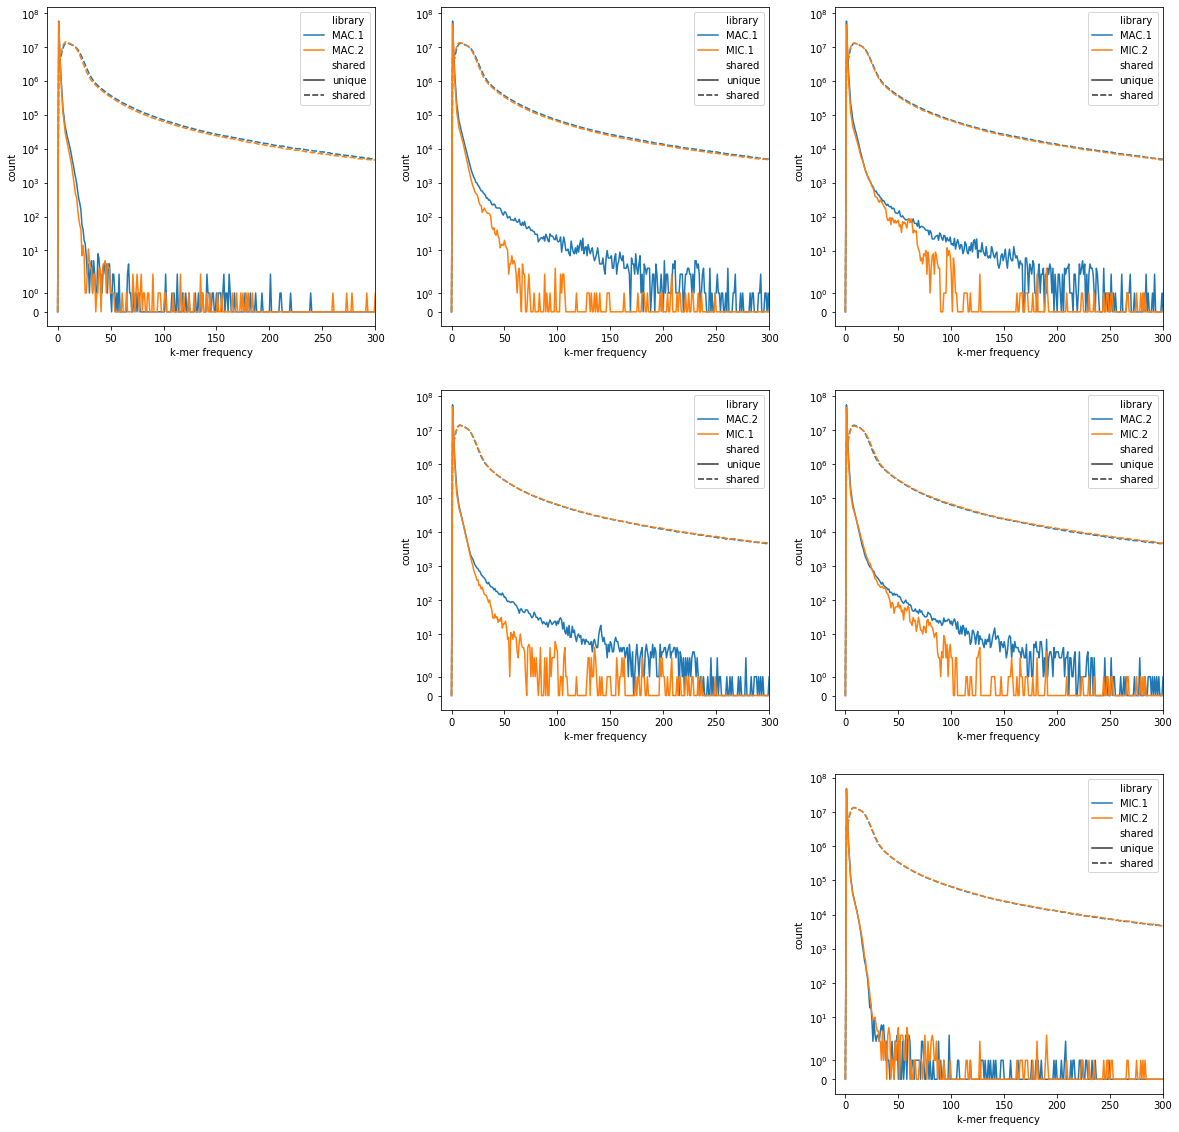

In [6]:
# Pairwise comparisons of k-mer shared vs. unique composition in 
# MIC vs. MAC libraries

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.lineplot(data=lib_AB, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(332)
sns.lineplot(data=lib_AC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(333)
sns.lineplot(data=lib_AD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(335)
sns.lineplot(data=lib_BC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(336)
sns.lineplot(data=lib_BD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(339)
sns.lineplot(data=lib_CD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.savefig("kat-comp.k21.LstrMAC_LstrMIC.150M-subsample_pairwise_comp.png")
plt.savefig("kat-comp.k21.LstrMAC_LstrMIC.150M-subsample_pairwise_comp.pdf")

In [7]:
lib_MAC_MIC = comp_matrix_to_shared_unique(
    "../kat/kat-comp.k21.LstrMAC.all.LstrMIC.all-main.mx",
    A_name='MAC', B_name='MIC')

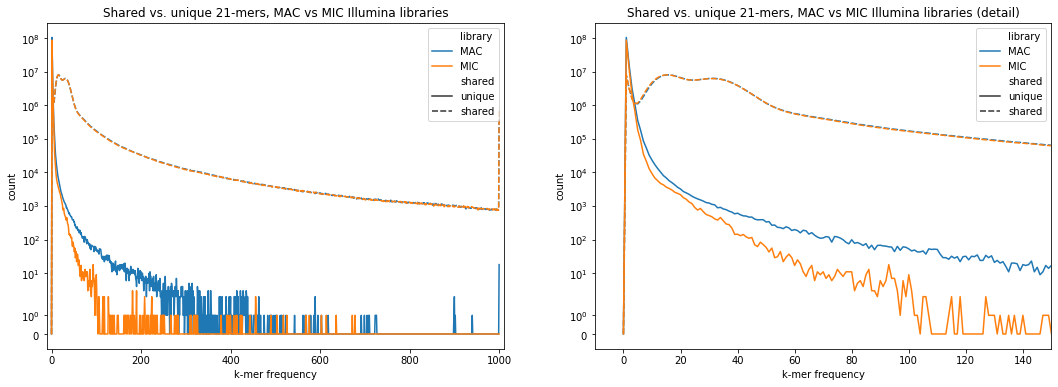

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.lineplot(data=lib_MAC_MIC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,1010)
plt.xlabel("k-mer frequency")
plt.title("Shared vs. unique 21-mers, MAC vs MIC Illumina libraries")
plt.yscale('symlog')

plt.subplot(122)
sns.lineplot(data=lib_MAC_MIC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,150)
plt.xlabel("k-mer frequency")
plt.title("Shared vs. unique 21-mers, MAC vs MIC Illumina libraries (detail)")
plt.yscale('symlog')

plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_comp.png")
plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_comp.pdf")

# Heatmap plots

In [10]:
mx_MIC_MAC = np.loadtxt(
    "../kat/kat-comp.k21.LstrMAC.all.LstrMIC.all-main.mx",
    dtype=int)

Use `log1p` scale to avoid Inf at zero values in matrix

In [11]:
%%bash
head -n10 ../kat/kat-comp.k21.LstrMAC.all.LstrMIC.all-main.mx

# Title:K-mer comparison plot
# XLabel:21-mer frequency for: 4519_E_R1_ktrim_qtrim28.fq.gz 4519_E_R2_ktrim_qtrim28.fq.gz 4519_G_R1_ktrim_qtrim28.fq.gz 4519_G_R2_ktrim_qtrim28.fq.gz
# YLabel:21-mer frequency for: 4519_F_R1_ktrim_qtrim28.fq.gz 4519_F_R2_ktrim_qtrim28.fq.gz 4519_H_R1_ktrim_qtrim28.fq.gz 4519_H_R2_ktrim_qtrim28.fq.gz
# ZLabel:# distinct 21-mers
# Columns:1001
# Rows:1001
# MaxVal:104768241
# Transpose:1
# Kmer value:21
# Input 1:/ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_E_R1_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_E_R2_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_G_R1_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_G_R2_ktrim_qtrim28.fq.gz


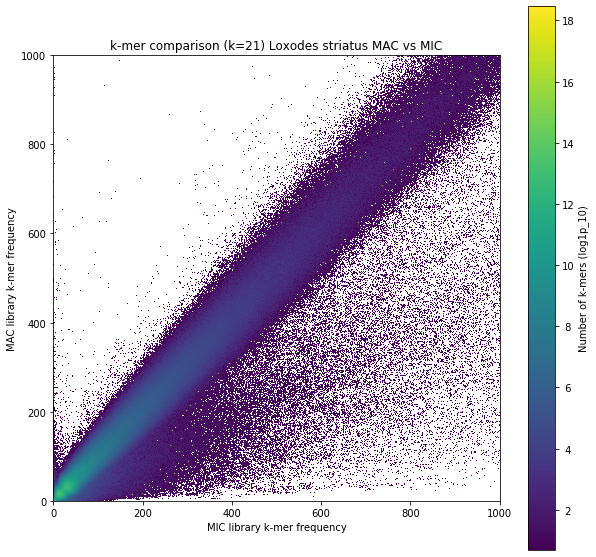

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,1000) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,1000)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes striatus MAC vs MIC")
plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_spectrum.png")
plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_spectrum.pdf")

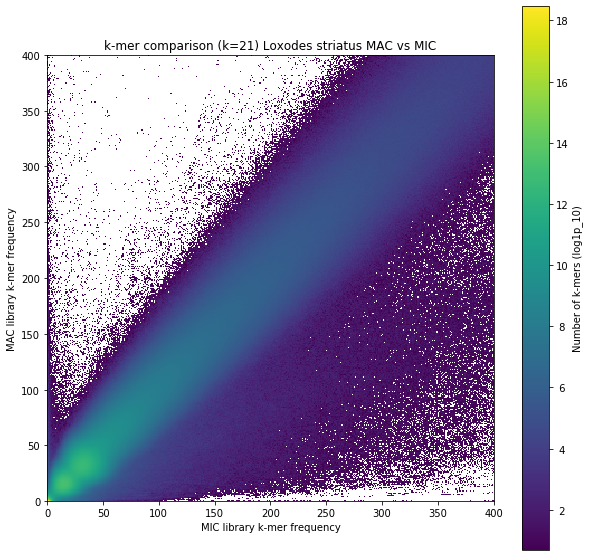

In [14]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,400) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,400)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes striatus MAC vs MIC")
plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_spectrum_detail.png")
plt.savefig("kat-comp.k21.LstrMAC.all.LstrMIC.all.pairwise_spectrum_detail.pdf")

Text(0.5, 1.0, 'k-mer comparison (k=21) Loxodes striatus MAC vs MIC')

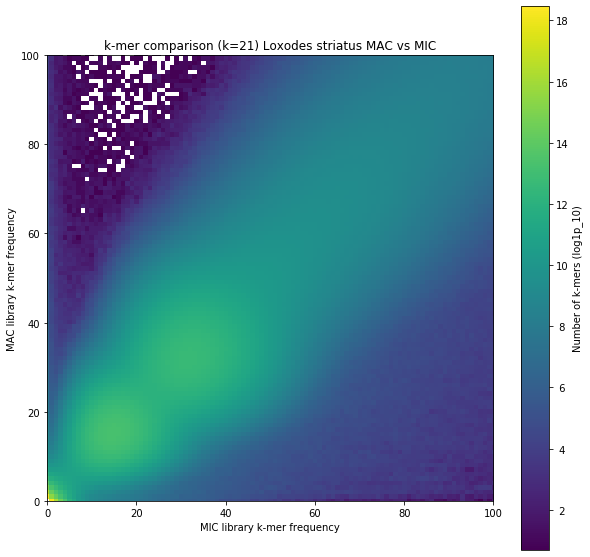

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,100) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,100)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes striatus MAC vs MIC")


In [16]:
k_counts = []
for mac_freq in range(0,1001):
    for mic_freq in range(0,1001):
        k_counts.append([mac_freq, mic_freq, mx_MIC_MAC[mac_freq, mic_freq]])
k_counts_df = pd.DataFrame(k_counts,columns=['mac_freq','mic_freq','count'])

## Below is old

Text(0.5, 0, 'MIC kmer frequency')

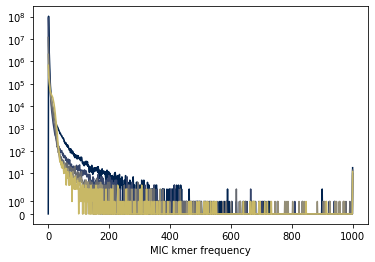

In [14]:
cmap = plt.cm.cividis
mac_min=0
mac_max=5
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")

Text(0.5, 0, 'MIC kmer frequency')

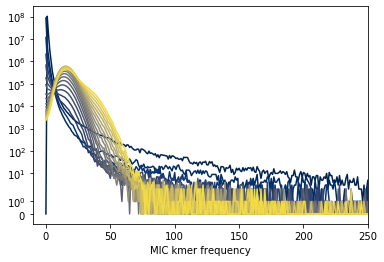

In [15]:
cmap = plt.cm.cividis
mac_min=0
mac_max=20
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlim(-10,250)
ax.set_xlabel("MIC kmer frequency")

We should aim to pull out k-mers that have frequency 0 to 5 in MAC and frequency >5 in MIC. Cutoff is arbitrary but we reason that is reasonable to exclude noise from sequencing error.

Text(0.5, 0, 'MIC kmer frequency')

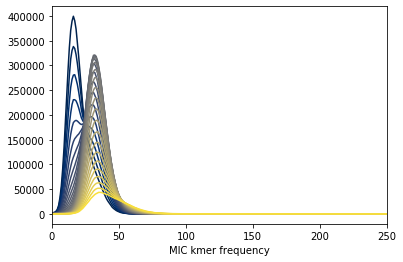

In [16]:
cmap = plt.cm.cividis
mac_min=20
mac_max=50
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
#ax.set_yscale('symlog')
ax.set_xlim(0,250)
ax.set_xlabel("MIC kmer frequency")

Text(0.5, 0, 'MAC kmer frequency')

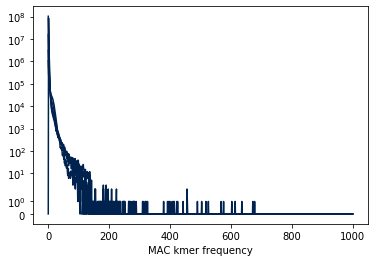

In [17]:
cmap = plt.cm.cividis
mic_min=0
mic_max=5
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")

(-10, 250)

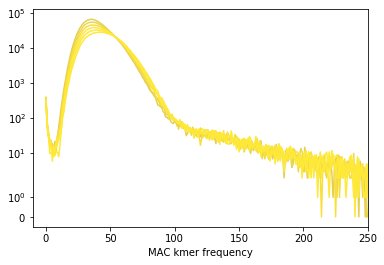

In [18]:
cmap = plt.cm.cividis
mic_min=47
mic_max=53
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

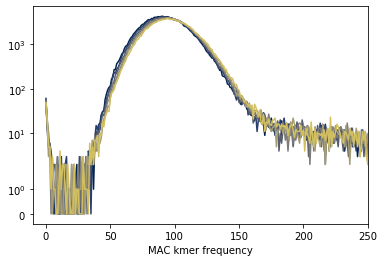

In [19]:
cmap = plt.cm.cividis
mic_min=97
mic_max=103
norm = colors.Normalize(vmin=mic_min, vmax=mic_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

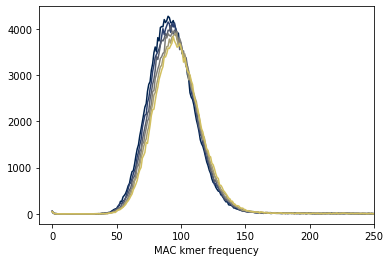

In [20]:
cmap = plt.cm.cividis
mic_min=97
mic_max=103
norm = colors.Normalize(vmin=mic_min, vmax=mic_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

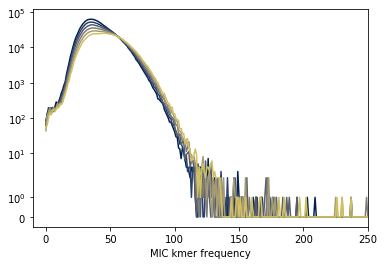

In [21]:
cmap = plt.cm.cividis
mac_min=47
mac_max=53
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

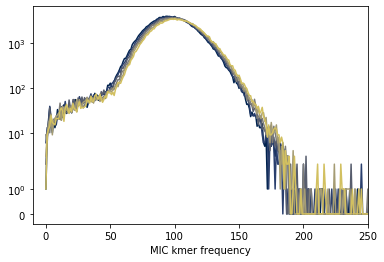

In [22]:
cmap = plt.cm.cividis
mac_min=97
mac_max=103
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

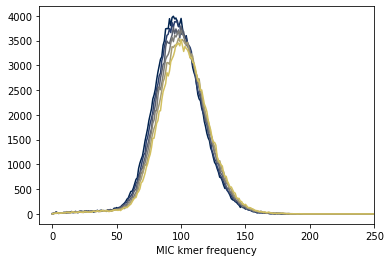

In [23]:
cmap = plt.cm.cividis
mac_min=97
mac_max=103
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)

# K-mer distance between libraries

Compare k-mer distances between forward:reverse reads of same libraries vs. MIC:MAC comparison.

In [26]:
import glob
import re

In [27]:
tbl = []
dist_metric = 'Canberra'
for fn in glob.glob('../kat/*Lstr*R1_R2*.stats'):
    with open(fn, 'r') as fh:
        [s1] = (re.findall(r'Lstr([A-Z]+)', fn))
        for line in fh:
            if dist_metric in line:
                val = line.rstrip().split(': ')[1]
                break
        tbl.append(['fwd_rev', s1, s1, float(val)])
for fn in glob.glob('../kat/*Lstr*rep*rep*.stats'):
    with open(fn, 'r') as fh:
        [s1, s2] = (re.findall(r'Lstr([A-Z]+)', fn))
        for line in fh:
            if dist_metric in line:
                val = line.rstrip().split(': ')[1]
                break
        if s1 == s2:
            tbl.append(['reps', s1, s2, float(val)])
        else:
            tbl.append(['cross', s1, s2, float(val)])

In [28]:
tbl = pd.DataFrame(tbl, columns=['category','lib1','lib2','distance'])

In [29]:
tbl

,category,lib1,lib2,distance
0,fwd_rev,MAC,MAC,270.5950
1,fwd_rev,MIC,MIC,225.2390
2,fwd_rev,MAC,MAC,249.4670
3,fwd_rev,MIC,MIC,247.0350
4,cross,MAC,MIC,34.9993
5,cross,MAC,MIC,26.9348
6,cross,MAC,MIC,27.8430
7,cross,MAC,MIC,33.0329
8,reps,MIC,MIC,18.7125
9,reps,MAC,MAC,48.4903


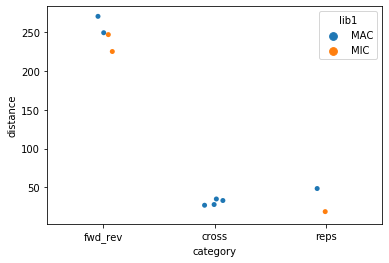

In [30]:
sns.stripplot(
    data=tbl,
    x='category',
    y='distance',
    hue='lib1'
)